#### MSIS model density for all observations(2015 storm)17th March at satellite altitude

In [17]:
import os
os.environ["CDF_LIB"] = "C:/Users/jose_ne/Downloads/cdf3.8.0_64bit_VS2015/lib"
from spacepy import pycdf
import pandas as pd

In [87]:
import spacepy.pycdf as pycdf
import pandas as pd
from pymsis import msis
import numpy as np

# Load the first CDF file
cdf1 = pycdf.CDF('SW_OPER_DNSCACC_2__20150317T000000_20150317T235950_apex.cdf')

# Load the second CDF file
cdf2 = pycdf.CDF('SW_OPER_DNSCACC_2__20150317T000000_20150317T235950_0201.cdf')

# Extract data from the CDF files
data1 = {key: cdf1[key][...] for key in cdf1.keys()}
data2 = {key: cdf2[key][...] for key in cdf2.keys()}

# Close the CDF files
cdf1.close()
cdf2.close()

# Convert data to DataFrame
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# Merge DataFrames on 'time' column
merged_df = pd.merge(df1, df2, on='time', how='outer')

# Set 'time' as index
merged_df.reset_index(inplace=True)

# Display the merged DataFrame
print(merged_df)
lats = merged_df['apex_lat']
lons = merged_df['apex_lon']
alt = merged_df['altitude']
altitude_km = alt/1000
date =merged_df['time']

f107=[113.2]*len(date)
f107a = [127.17]*len(date)
ap = 108

#One years worth of data at the 12th hour every day
#date = np.datetime64("2014-02-01T12:00")
aps = [[ap] * 7]*len(date)
output = msis.run(date, lons, lats, altitude_km, f107, f107a, aps)


#output is now of the shape (1, nlons, nlats, 1, 11)
#Get rid of the single dimensions
msis_z = np.squeeze(output)
msis_dens_z = msis_z[:,0]
msis_z_df_2015storm = pd.DataFrame(msis_dens_z, columns=['Column1'])

print(msis_z_df_2015storm)

      index   apex_lat    apex_lon                time       density  \
0         0  18.164820   11.297814 2015-03-17 00:00:00  8.777784e-13   
1         1  18.503622   11.419566 2015-03-17 00:00:10  8.903567e-13   
2         2  18.855280   11.541426 2015-03-17 00:00:20  9.070450e-13   
3         3  19.219147   11.663323 2015-03-17 00:00:30  9.236609e-13   
4         4  19.594610   11.785192 2015-03-17 00:00:40  9.232573e-13   
...     ...        ...         ...                 ...           ...   
8635   8635  48.023911 -173.818008 2015-03-17 23:59:10  2.377511e-12   
8636   8636  47.406528 -173.786118 2015-03-17 23:59:20  2.376534e-12   
8637   8637  46.789211 -173.758301 2015-03-17 23:59:30  2.356771e-12   
8638   8638  46.172031 -173.734406 2015-03-17 23:59:40  2.377370e-12   
8639   8639  45.555065 -173.714264 2015-03-17 23:59:50  2.374148e-12   

           altitude   latitude   longitude  local_solar_time  
0     457610.919685   2.227591  -63.256035         19.639737  
1     457

#### MSIS model density for all observations(2015 storm)17th March at a constant altitude 453.46km

In [88]:
lats = merged_df['apex_lat']
lons = merged_df['apex_lon']
date =merged_df['time']
alt = [453.46]*len(date)

f107=[113.2]*len(date)
f107a = [127.17]*len(date)
ap = 108

# One years worth of data at the 12th hour every day
#date = np.datetime64("2014-02-01T12:00")
aps = [[ap] * 7]*len(date)
output = msis.run(date, lons, lats, alt, f107, f107a, aps)
#  output is now of the shape (1, nlons, nlats, 1, 11)
# Get rid of the single dimensions
msis_z0 = np.squeeze(output)
msis_dens_z0 = msis_z0[:,0]
msis_z0_df_2015storm = pd.DataFrame(msis_dens_z0, columns=['Column1'])
print(msis_z0_df_2015storm)

merged_df['msis_allalt'] = msis_z_df_2015storm
merged_df['msis_constantalt'] = msis_z0_df_2015storm
print(merged_df)

           Column1
0     1.197403e-12
1     1.192004e-12
2     1.186432e-12
3     1.180709e-12
4     1.174841e-12
...            ...
8635  2.320276e-12
8636  2.324793e-12
8637  2.329219e-12
8638  2.333559e-12
8639  2.337781e-12

[8640 rows x 1 columns]
      index   apex_lat    apex_lon                time       density  \
0         0  18.164820   11.297814 2015-03-17 00:00:00  8.777784e-13   
1         1  18.503622   11.419566 2015-03-17 00:00:10  8.903567e-13   
2         2  18.855280   11.541426 2015-03-17 00:00:20  9.070450e-13   
3         3  19.219147   11.663323 2015-03-17 00:00:30  9.236609e-13   
4         4  19.594610   11.785192 2015-03-17 00:00:40  9.232573e-13   
...     ...        ...         ...                 ...           ...   
8635   8635  48.023911  186.181992 2015-03-17 23:59:10  2.377511e-12   
8636   8636  47.406528  186.213882 2015-03-17 23:59:20  2.376534e-12   
8637   8637  46.789211  186.241699 2015-03-17 23:59:30  2.356771e-12   
8638   8638  46.172031  186

#### Normalized density for Storm day(2015 March 17) complete observations at a constant altitude 453.46km

      index   apex_lat    apex_lon                time       density  \
0         0  18.164820   11.297814 2015-03-17 00:00:00  8.777784e-13   
1         1  18.503622   11.419566 2015-03-17 00:00:10  8.903567e-13   
2         2  18.855280   11.541426 2015-03-17 00:00:20  9.070450e-13   
3         3  19.219147   11.663323 2015-03-17 00:00:30  9.236609e-13   
4         4  19.594610   11.785192 2015-03-17 00:00:40  9.232573e-13   
...     ...        ...         ...                 ...           ...   
8635   8635  48.023911  186.181992 2015-03-17 23:59:10  2.377511e-12   
8636   8636  47.406528  186.213882 2015-03-17 23:59:20  2.376534e-12   
8637   8637  46.789211  186.241699 2015-03-17 23:59:30  2.356771e-12   
8638   8638  46.172031  186.265594 2015-03-17 23:59:40  2.377370e-12   
8639   8639  45.555065  186.285736 2015-03-17 23:59:50  2.374148e-12   

           altitude   latitude   longitude  local_solar_time   msis_allalt  \
0     457610.919685   2.227591  -63.256035         19.639

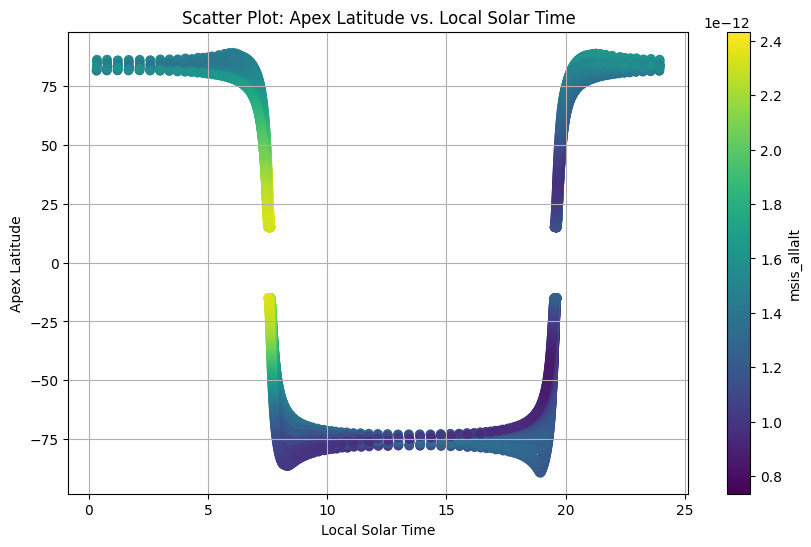

In [89]:
import matplotlib.pyplot as plt

dens_z = merged_df['density']
dens_Mz = merged_df['msis_allalt']
dens_Mz0 = merged_df['msis_constantalt']

dens_z0 = dens_z * dens_Mz0 / dens_Mz
merged_df['Norm_dens_alt453.46'] = dens_z0


#print(f"Normalized Density at Altitude 490: {dens_z0}")
print(merged_df)

plt.figure(figsize=(10, 6))
plt.scatter(merged_df['local_solar_time'], merged_df['apex_lat'], c=merged_df['msis_allalt'], cmap='viridis')
plt.colorbar(label='msis_allalt')
plt.xlabel('Local Solar Time')
plt.ylabel('Apex Latitude')
plt.title('Scatter Plot: Apex Latitude vs. Local Solar Time')
plt.grid(True)
plt.show()

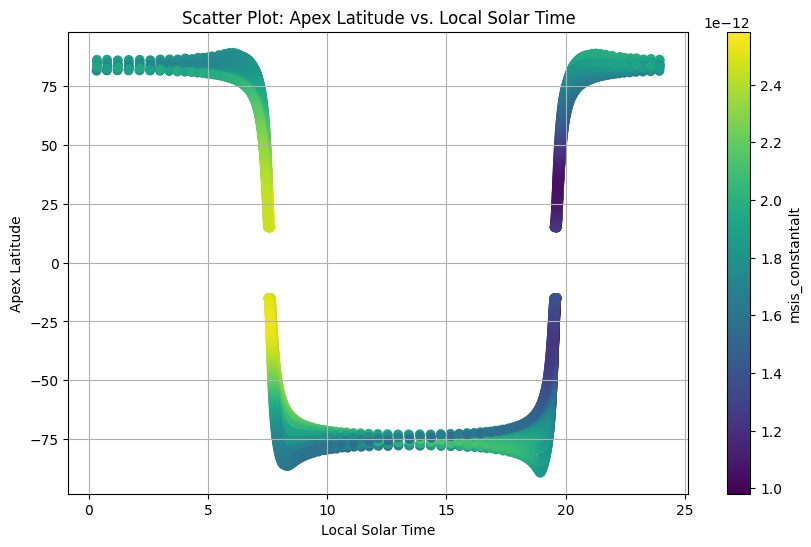

In [90]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['local_solar_time'], merged_df['apex_lat'], c=merged_df['msis_constantalt'], cmap='viridis')
plt.colorbar(label='msis_constantalt')
plt.xlabel('Local Solar Time')
plt.ylabel('Apex Latitude')
plt.title('Scatter Plot: Apex Latitude vs. Local Solar Time')
plt.grid(True)
plt.show()

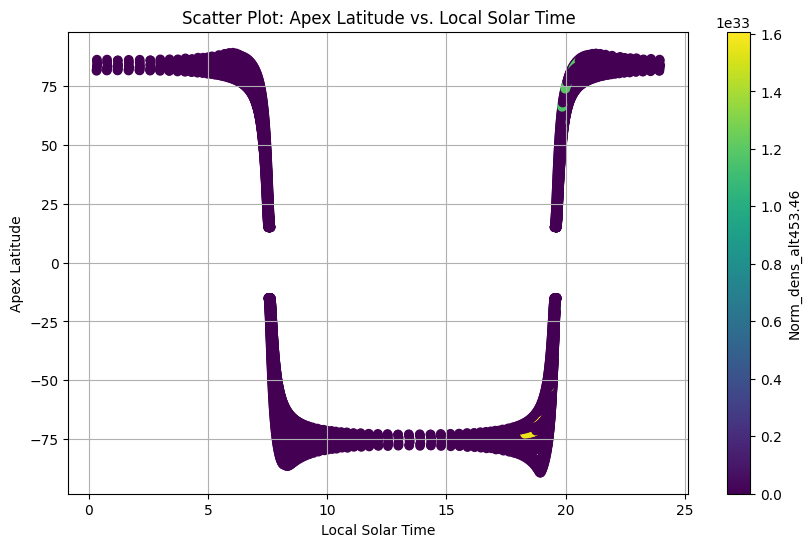

In [92]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['local_solar_time'], merged_df['apex_lat'], c=merged_df['Norm_dens_alt453.46'], cmap='viridis')
plt.colorbar(label='Norm_dens_alt453.46')
plt.xlabel('Local Solar Time')
plt.ylabel('Apex Latitude')
plt.title('Scatter Plot: Apex Latitude vs. Local Solar Time')
plt.grid(True)
plt.show()

      index   apex_lat    apex_lon                time       density  \
0         0  18.164820   11.297814 2015-03-17 00:00:00  8.777784e-13   
1         1  18.503622   11.419566 2015-03-17 00:00:10  8.903567e-13   
2         2  18.855280   11.541426 2015-03-17 00:00:20  9.070450e-13   
3         3  19.219147   11.663323 2015-03-17 00:00:30  9.236609e-13   
4         4  19.594610   11.785192 2015-03-17 00:00:40  9.232573e-13   
...     ...        ...         ...                 ...           ...   
8635   8635  48.023911  186.181992 2015-03-17 23:59:10  2.377511e-12   
8636   8636  47.406528  186.213882 2015-03-17 23:59:20  2.376534e-12   
8637   8637  46.789211  186.241699 2015-03-17 23:59:30  2.356771e-12   
8638   8638  46.172031  186.265594 2015-03-17 23:59:40  2.377370e-12   
8639   8639  45.555065  186.285736 2015-03-17 23:59:50  2.374148e-12   

           altitude   latitude   longitude  local_solar_time   msis_allalt  \
0     457610.919685   2.227591  -63.256035         19.639

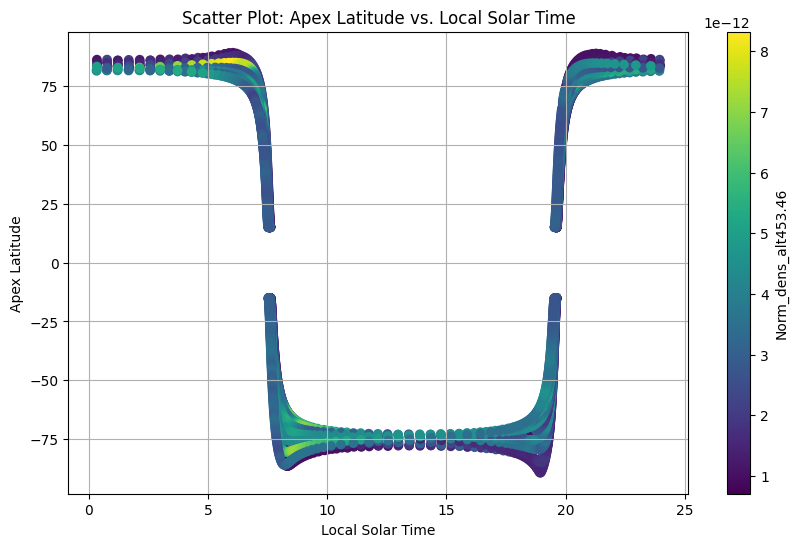

In [93]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

dens_z = merged_df['density']
dens_Mz = merged_df['msis_allalt']
dens_Mz0 = merged_df['msis_constantalt']

dens_z0 = dens_z * dens_Mz0 / dens_Mz
merged_df['Norm_dens_alt453.46'] = dens_z0
#print(f"Normalized Density at Altitude 453.46: {dens_z0}")
z_scores = np.abs(stats.zscore(merged_df['Norm_dens_alt453.46']))

# Define a threshold for Z-score (e.g., 3)
threshold = 3

# Filter out the outliers
merged_df_no_outliers = merged_df[(z_scores < threshold)]
print(merged_df_no_outliers)

plt.figure(figsize=(10, 6))
plt.scatter(merged_df_no_outliers['local_solar_time'], merged_df_no_outliers['apex_lat'], c=merged_df_no_outliers['Norm_dens_alt453.46'], cmap='viridis')
plt.colorbar(label='Norm_dens_alt453.46')
plt.xlabel('Local Solar Time')
plt.ylabel('Apex Latitude')
plt.title('Scatter Plot: Apex Latitude vs. Local Solar Time')
plt.grid(True)
plt.show()

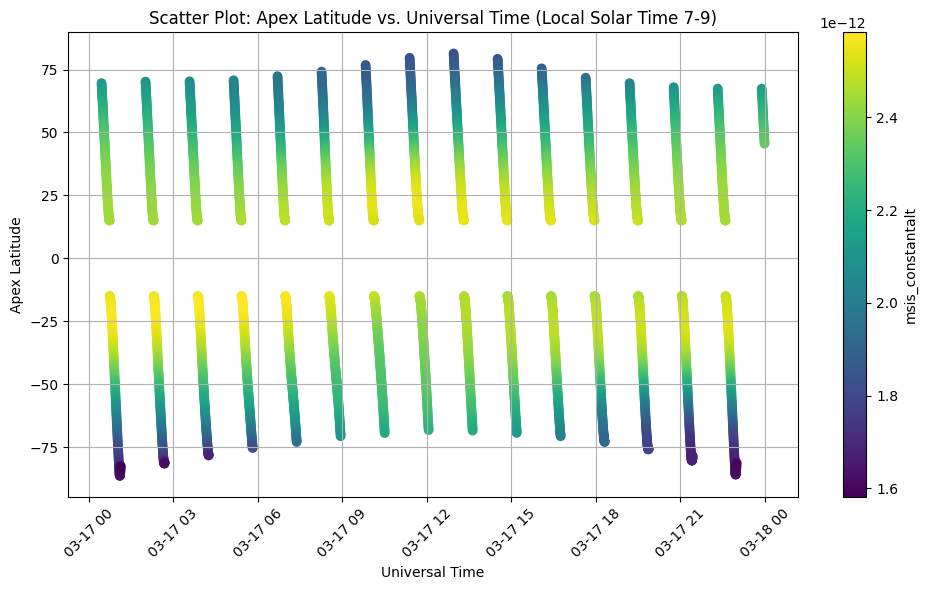

In [94]:
import matplotlib.pyplot as plt
from scipy import stats

# Filter data for local solar time between 7 and 9
filtered_df = merged_df[(merged_df['local_solar_time'] >= 7) & (merged_df['local_solar_time'] <= 9)]

# Plotting
plt.figure(figsize=(10, 6))

plt.scatter(filtered_df['time'], filtered_df['apex_lat'], c=filtered_df['msis_constantalt'], cmap='viridis')
plt.colorbar(label='msis_constantalt')
plt.xlabel('Universal Time')
plt.ylabel('Apex Latitude')
plt.title('Scatter Plot: Apex Latitude vs. Universal Time (Local Solar Time 7-9)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

      index   apex_lat    apex_lon                time       density  \
162     162  69.627914  174.220871 2015-03-17 00:27:00  8.070694e-13   
163     163  69.052612  174.542511 2015-03-17 00:27:10  8.204291e-13   
164     164  68.475433  174.845276 2015-03-17 00:27:20  8.224114e-13   
165     165  67.896416  175.130463 2015-03-17 00:27:30  8.088924e-13   
166     166  67.315613  175.399277 2015-03-17 00:27:40  8.097780e-13   
...     ...        ...         ...                 ...           ...   
8635   8635  48.023911  186.181992 2015-03-17 23:59:10  2.377511e-12   
8636   8636  47.406528  186.213882 2015-03-17 23:59:20  2.376534e-12   
8637   8637  46.789211  186.241699 2015-03-17 23:59:30  2.356771e-12   
8638   8638  46.172031  186.265594 2015-03-17 23:59:40  2.377370e-12   
8639   8639  45.555065  186.285736 2015-03-17 23:59:50  2.374148e-12   

           altitude   latitude   longitude  local_solar_time   msis_allalt  \
162   466075.548619  73.799744  100.744280          7.023

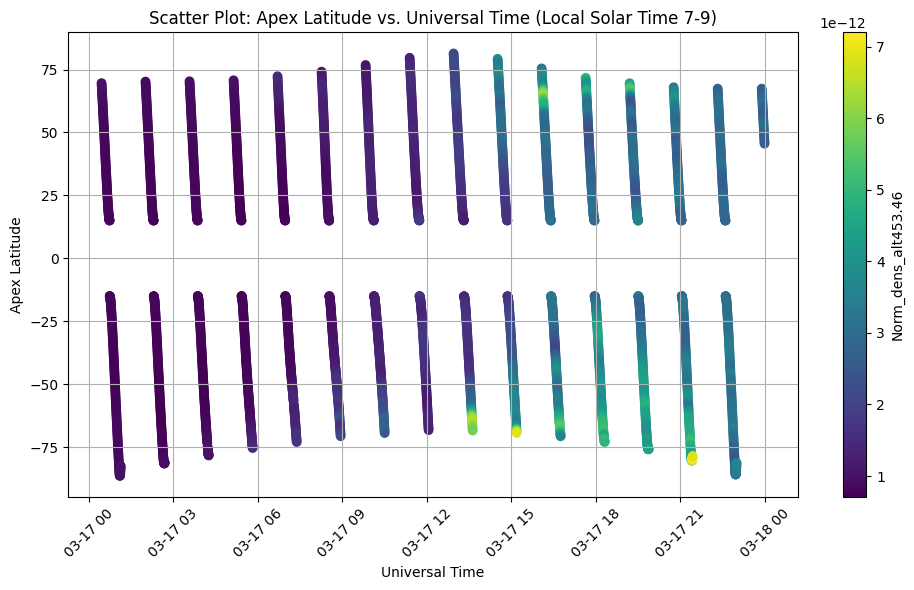

In [95]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

# Filter data for local solar time between 7 and 9
filtered_df = merged_df[(merged_df['local_solar_time'] >= 7) & (merged_df['local_solar_time'] <= 9)]

z_scores = np.abs(stats.zscore(filtered_df['Norm_dens_alt453.46']))

# Define a threshold for Z-score (e.g., 3)
threshold = 3

# Filter out the outliers
filtered_merged_df_no_outliers = filtered_df[(z_scores < threshold)].copy()
filtered_merged_df_no_outliers['column_difference'] = filtered_merged_df_no_outliers['msis_constantalt'] - filtered_merged_df_no_outliers['Norm_dens_alt453.46']
print(filtered_merged_df_no_outliers)

plt.figure(figsize=(10, 6))

plt.scatter(filtered_merged_df_no_outliers['time'], filtered_merged_df_no_outliers['apex_lat'], c=filtered_merged_df_no_outliers['Norm_dens_alt453.46'], cmap='viridis')
plt.colorbar(label='Norm_dens_alt453.46')
plt.xlabel('Universal Time')
plt.ylabel('Apex Latitude')
plt.title('Scatter Plot: Apex Latitude vs. Universal Time (Local Solar Time 7-9)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

#### MSIS model density for all observations(2015 storm)16th March at satellite altitude

In [96]:
import spacepy.pycdf as pycdf
import pandas as pd
from pymsis import msis
import numpy as np

# Load the first CDF file
cdf3 = pycdf.CDF('SW_OPER_DNSCACC_2__20150316T000000_20150316T235950_apex.cdf')

# Load the second CDF file
cdf4 = pycdf.CDF('SW_OPER_DNSCACC_2__20150316T000000_20150316T235950_0201.cdf')

# Extract data from the CDF files
data3 = {key: cdf3[key][...] for key in cdf3.keys()}
data4 = {key: cdf4[key][...] for key in cdf4.keys()}

# Close the CDF files
cdf3.close()
cdf4.close()

# Convert data to DataFrame
df3 = pd.DataFrame(data3)
df4 = pd.DataFrame(data4)

# Merge DataFrames on 'time' column
merged_df_16 = pd.merge(df3, df4, on='time', how='outer')

# Set 'time' as index
merged_df_16.reset_index(inplace=True)

# Display the merged DataFrame
print(merged_df_16)
lats = merged_df_16['apex_lat']
lons = merged_df_16['apex_lon']
alt = merged_df_16['altitude']
altitude_km = alt/1000
date =merged_df_16['time']

f107=[116]*len(date)
f107a = [127.17]*len(date)
ap = 12

#One years worth of data at the 12th hour every day
#date = np.datetime64("2014-02-01T12:00")
aps = [[ap] * 7]*len(date)
output = msis.run(date, lons, lats, altitude_km, f107, f107a, aps)


#output is now of the shape (1, nlons, nlats, 1, 11)
#Get rid of the single dimensions
msis_z_16 = np.squeeze(output)
msis_dens_z_16 = msis_z_16[:,0]
msis_z_df_2015_16 = pd.DataFrame(msis_dens_z_16, columns=['Column1'])

print(msis_z_df_2015_16)

      index   apex_lat    apex_lon                time       density  \
0         0 -67.450897 -166.511398 2015-03-16 00:00:00  7.157833e-13   
1         1 -68.121841 -166.509125 2015-03-16 00:00:10  7.090025e-13   
2         2 -68.791916 -166.504944 2015-03-16 00:00:20  7.043682e-13   
3         3 -69.461075 -166.498642 2015-03-16 00:00:30  6.961349e-13   
4         4 -70.129288 -166.489975 2015-03-16 00:00:40  6.912562e-13   
...     ...        ...         ...                 ...           ...   
8635   8635  16.687859   10.693172 2015-03-16 23:59:10  7.774446e-13   
8636   8636  16.952009   10.813313 2015-03-16 23:59:20  7.878436e-13   
8637   8637  17.232533   10.933922 2015-03-16 23:59:30  8.102842e-13   
8638   8638  17.528696   11.054923 2015-03-16 23:59:40  8.431188e-13   
8639   8639  17.839779   11.176246 2015-03-16 23:59:50  8.505399e-13   

           altitude   latitude   longitude  local_solar_time  
0     476646.137631 -52.951450  121.485499          7.951130  
1     476

#### MSIS model density for all observations(2015 storm)16th March at a constant altitude 453.46km

In [97]:
lats = merged_df_16['apex_lat']
lons = merged_df_16['apex_lon']
date =merged_df_16['time']
alt = [453.46]*len(date)

f107=[116]*len(date)
f107a = [127.17]*len(date)
ap = 12

# One years worth of data at the 12th hour every day
#date = np.datetime64("2014-02-01T12:00")
aps = [[ap] * 7]*len(date)
output = msis.run(date, lons, lats, alt, f107, f107a, aps)
#  output is now of the shape (1, nlons, nlats, 1, 11)
# Get rid of the single dimensions
msis_z0_16 = np.squeeze(output)
msis_dens_z0_16 = msis_z0_16[:,0]
msis_z0_df_2015_16 = pd.DataFrame(msis_dens_z0_16, columns=['Column1'])
print(msis_z0_df_2015_16)

merged_df_16['msis_allalt'] = msis_z_df_2015_16
merged_df_16['msis_constantalt'] = msis_z0_df_2015_16
print(merged_df_16)

           Column1
0     1.361378e-12
1     1.349746e-12
2     1.338140e-12
3     1.326630e-12
4     1.315155e-12
...            ...
8635  7.353974e-13
8636  7.343539e-13
8637  7.332530e-13
8638  7.320934e-13
8639  7.308792e-13

[8640 rows x 1 columns]
      index   apex_lat    apex_lon                time       density  \
0         0 -67.450897  193.488602 2015-03-16 00:00:00  7.157833e-13   
1         1 -68.121841  193.490875 2015-03-16 00:00:10  7.090025e-13   
2         2 -68.791916  193.495056 2015-03-16 00:00:20  7.043682e-13   
3         3 -69.461075  193.501358 2015-03-16 00:00:30  6.961349e-13   
4         4 -70.129288  193.510025 2015-03-16 00:00:40  6.912562e-13   
...     ...        ...         ...                 ...           ...   
8635   8635  16.687859   10.693172 2015-03-16 23:59:10  7.774446e-13   
8636   8636  16.952009   10.813313 2015-03-16 23:59:20  7.878436e-13   
8637   8637  17.232533   10.933922 2015-03-16 23:59:30  8.102842e-13   
8638   8638  17.528696   11

#### Normalized density for Storm day(2015 March 16) complete observations at a constant altitude 453.46km

#### MSIS model density for all observations(2015 storm)18th March at satellite altitude

#### MSIS model density for all observations(2015 storm)18th March at a constant altitude 453.46km

#### Normalized density for Storm day(2015 March 16) complete observations at a constant altitude 453.46km

### Plot the data for local solar time between 7 & 9, over Universal Time and Apex Latitude

#### Plot the diffrence between observed density and the model density. Does it change during the storm conditions? How much is it during quiet conditions and how much is it during storm conditions?

### Plot the data for local solar time between 19 & 21, over Universal Time and Apex Latitude

#### Plot the diffrence between observed density and the model density for local solar time 19 & 21

### Combine 2014 - 2023 original swarm data and apex cdf file. Then calculate model density and Normalized density at altitude 453.46km

### 2014

#### Normalized density for 2014 at a constant altitude 453.46km

### 2015

### 2016

### 2017

In [2]:
##2018